In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras import backend as K
#from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4999177982297457661
xla_global_id: -1
]


In [3]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices()) 

['/device:CPU:0']


In [4]:
import pandas as pd
train_data = pd.read_csv('/data/yingfei/cancer_data/train_data_cnv.csv')
test_data = pd.read_csv('/data/yingfei/cancer_data/test_data_cnv.csv')

In [5]:
print(f'Train Shape: {train_data.shape}')
print(f'Test Shape: {test_data.shape}')

Train Shape: (203918, 2652)
Test Shape: (22878, 2652)


In [6]:
train_data = train_data.loc[train_data['auc'] >= 0]

In [7]:
train_data = train_data.reset_index(drop = True)
train_data

,ARXSPAN_ID,DRUG_NAME,ABL1,ACVR1B,AKT1,AKT2,AKT3,ALK,ALOX12B,FAM123B,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,auc
0,ACH-000001,JW-7-24-1,1,1,1,1,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0.778432
1,ACH-000001,KIN001-260,1,1,1,1,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0.951321
2,ACH-000001,NSC-87877,1,1,1,1,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0.840287
3,ACH-000001,PLX-4720,1,1,1,1,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0.936410
4,ACH-000001,ERK5-IN-1,1,1,1,1,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0.891908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203913,ACH-001716,KIN001-236,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.956865
203914,ACH-001716,LUMINESPIB,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.975168
203915,ACH-001716,NUTLIN-3A,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.871995
203916,ACH-001716,SGC0946,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.975417


In [8]:
test_data = test_data.loc[test_data['auc'] >= 0]

In [9]:
test_data = test_data.reset_index(drop = True)
test_data

,ARXSPAN_ID,DRUG_NAME,ABL1,ACVR1B,AKT1,AKT2,AKT3,ALK,ALOX12B,FAM123B,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,auc
0,ACH-000802,JW-7-24-1,1,0,1,-1,1,1,-1,0,...,0,0,0,0,0,0,0,0,0,0.528562
1,ACH-000802,KIN001-260,1,0,1,-1,1,1,-1,0,...,0,0,0,0,0,0,0,0,0,0.930958
2,ACH-000802,NSC-87877,1,0,1,-1,1,1,-1,0,...,0,0,0,0,0,0,0,0,0,0.759249
3,ACH-000802,PLX-4720,1,0,1,-1,1,1,-1,0,...,0,0,0,0,0,0,0,0,0,0.936510
4,ACH-000802,ERK5-IN-1,1,0,1,-1,1,1,-1,0,...,0,0,0,0,0,0,0,0,0,0.823453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22873,ACH-000438,KIN001-266,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.975578
22874,ACH-000438,LUMINESPIB,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.980529
22875,ACH-000438,NUTLIN-3A,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.960501
22876,ACH-000438,SGC0946,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.970524


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
padel_features = train_data[train_data.columns[-2326:-1]]
padel_features = scaler.fit_transform(padel_features)
padel_features = pd.DataFrame(padel_features)
#train_features = train_data.drop(columns = ['ARXSPAN_ID', 'DRUG_NAME','auc'])
#train_features = scaler.fit_transform(train_features)
train_features = train_data[train_data.columns[2:-2326]]
train_features = pd.concat([train_features, padel_features], axis = 1)
train_features = train_features.to_numpy()
train_features

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
train_label = train_data['auc']
print(f'Minimum train y value: {min(train_label)}, \
      Maximum train y value: {max(train_label)}')

Minimum train y value: 0.004496,       Maximum train y value: 0.999883


In [12]:
padel_features = test_data[test_data.columns[-2326:-1]]
padel_features = scaler.fit_transform(padel_features)
padel_features = pd.DataFrame(padel_features)
#test_features = test_data.drop(columns = ['ARXSPAN_ID', 'DRUG_NAME','auc'])
#test_features = scaler.transform(test_features)
test_features = test_data[test_data.columns[2:-2326]]
test_features = pd.concat([test_features, padel_features], axis = 1)
test_features = test_features.to_numpy()
test_features

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
test_label = test_data['auc']
print(f'Minimum test y value: {min(test_label)}, \
      Maximum test y value: {max(test_label)}')

Minimum test y value: 0.013524,       Maximum test y value: 0.998284


In [14]:
train_X, train_y, test_X, test_y = train_features, train_label, test_features, test_label

In [15]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)

In [16]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(203918, 2649, 1) (203918,) (22878, 2649, 1) (22878,)


In [17]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (203918, 2649, 1)
203918 train samples
22878 test samples


In [18]:
train_X = np.nan_to_num(train_X)
train_y = np.nan_to_num(train_y)
test_X = np.nan_to_num(test_X)
test_y = np.nan_to_num(test_y)

In [19]:
from bayes_opt import BayesianOptimization, UtilityFunction

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
### split into train and validation set
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, random_state = 42)

In [22]:
### Hyperparameters set
params_lst = ["learning_rate", "batch_size", "optimizer"]
params_value_dict = {"learning_rate": [1e-4, 2e-4, 5e-4], 
                     "batch_size": [80, 100, 120], 
                     "optimizer": ['sgd', 'adam']}
import itertools as it

allparams = params_value_dict
combinations = it.product(*(params_value_dict[param] for param in allparams))
combinations_lst = list(combinations)
print(len(combinations_lst))

hyper_param_dict = {}
for i in range(len(combinations_lst)):
    hyper_param_dict[i] = {}
    for j in range(len(params_lst)):
        hyper_param_dict[i][params_lst[j]] = combinations_lst[i][j]

18


In [23]:
import json
from keras.models import model_from_json, load_model
workdir = "resnet_ht_models/cnv_model"

model_eval_dict = {}
model_dict = {}
training_epochs = 10
model_ht_history = {}

for i in hyper_param_dict:
    params_dict = hyper_param_dict[i]
    learning_rate=params_dict["learning_rate"] 
    batch_size=params_dict["batch_size"] 
    opt_name=params_dict["optimizer"]
    
    # hyper parameters
    num_classes = 1
    if opt_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate)
    else: # sgd
        optimizer = keras.optimizers.SGD(learning_rate)
    
    with K.tf.device('/GPU:0'): # model compile
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
        x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
    #     y = x
        x = Activation('tanh')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

    #     x = AveragePooling1D(pool_size=8)(x)
        x = Flatten()(x)
        x = Dense(units=2048, name='dense1'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout1') (x)
        x = Activation('relu')(x)

    #    x = Reshape((300,1))(x)

    #    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
    #    x = MaxPooling1D(pool_size=2)(x)
    #    x = BatchNormalization()(x)

        x = Dense(units=1024, name='dense5'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout5') (x)
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense6'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout6') (x)
        x = Activation('relu')(x)

        x = Dense(units=1024, name='dense7'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout7') (x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense8'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout8') (x)
        x = Activation('relu')(x)

        x = Dense(units=256, name='dense9'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout9') (x)
        x = Activation('relu')(x)

        x = Dense(units=128, name='dense10'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout10') (x)
        x = Activation('relu')(x)


        predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)

        model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=optimizer,
                      metrics=['mse','mae'])
        
        # model training
        StartTime8 = datetime.now()
        print("StartTime :", StartTime8)
        with K.tf.device('/GPU:0'):
            model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                                validation_data=(val_X, val_y))

        EndTime8 = datetime.now()
        print("EndTime :", EndTime8)
    model.save_weights(workdir+ f'/model_{i}_new.h5')
    with open(workdir + f'/model_architecture_{i}_new.json', 'w') as f:
        f.write(model.to_json())
        
    # evaluation
    print(f"Evaluating model {i}...")
    test_score = model.evaluate(test_X, test_y, verbose=1)
    model_ht_history[(learning_rate, batch_size)] = model
    loss, mse, mae = test_score
    print("loss=%.6f, mse=%.6f, mae=%.6f"%(loss, mse, mae))
    
    model_dict[i] = model
    model_eval_dict[i] = {"loss":loss, "mse":mse, "mae":mae}

StartTime : 2023-03-15 16:36:10.976750
Epoch 1/10
1912/1912 [==============================] - 346s 175ms/step - loss: 0.6638 - mse: 0.6638 - mae: 0.6419 - val_loss: 0.2243 - val_mse: 0.2243 - val_mae: 0.3766
Epoch 2/10
1912/1912 [==============================] - 333s 174ms/step - loss: 0.4121 - mse: 0.4121 - mae: 0.5081 - val_loss: 0.1603 - val_mse: 0.1603 - val_mae: 0.3188
Epoch 3/10
1912/1912 [==============================] - 342s 179ms/step - loss: 0.3073 - mse: 0.3073 - mae: 0.4389 - val_loss: 0.1202 - val_mse: 0.1202 - val_mae: 0.2756
Epoch 4/10
1912/1912 [==============================] - 339s 177ms/step - loss: 0.2398 - mse: 0.2398 - mae: 0.3879 - val_loss: 0.1014 - val_mse: 0.1014 - val_mae: 0.2544
Epoch 5/10
1912/1912 [==============================] - 347s 181ms/step - loss: 0.1950 - mse: 0.1950 - mae: 0.3500 - val_loss: 0.0839 - val_mse: 0.0839 - val_mae: 0.2325
Epoch 6/10
1912/1912 [==============================] - 348s 182ms/step - loss: 0.1652 - mse: 0.1652 - mae: 0.3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 333s 211ms/step - loss: 0.9382 - mse: 0.9382 - mae: 0.7597 - val_loss: 0.3313 - val_mse: 0.3313 - val_mae: 0.4617
Epoch 2/10
1530/1530 [==============================] - 316s 207ms/step - loss: 0.5069 - mse: 0.5069 - mae: 0.5617 - val_loss: 0.2151 - val_mse: 0.2151 - val_mae: 0.3703
Epoch 3/10
1530/1530 [==============================] - 323s 211ms/step - loss: 0.3653 - mse: 0.3653 - mae: 0.4770 - val_loss: 0.1497 - val_mse: 0.1497 - val_mae: 0.3082
Epoch 4/10
1530/1530 [==============================] - 321s 210ms/step - loss: 0.2804 - mse: 0.2804 - mae: 0.4166 - val_loss: 0.1138 - val_mse: 0.1138 - val_mae: 0.2704
Epoch 5/10
1530/1530 [==============================] - 319s 209ms/step - loss: 0.2273 - mse: 0.2273 - mae: 0.3729 - val_loss: 0.0952 - val_mse: 0.0952 - val_mae: 0.2465
Epoch 6/10
1530/1530 [==============================] - 316s 206ms/step - loss: 0.1878 - mse: 0.1878 - mae: 0.3381 - val_loss: 0.0776 - val_mse: 0.0776 - val_mae

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 315s 206ms/step - loss: 0.1129 - mse: 0.1129 - mae: 0.2588 - val_loss: 0.0456 - val_mse: 0.0456 - val_mae: 0.1697
EndTime : 2023-03-15 19:23:48.535253
Evaluating model 2...
715/715 [==============================] - 26s 36ms/step - loss: 0.0473 - mse: 0.0473 - mae: 0.1729
loss=0.047316, mse=0.047316, mae=0.172861
StartTime : 2023-03-15 19:24:32.984215
Epoch 1/10
1530/1530 [==============================] - 305s 191ms/step - loss: 0.1517 - mse: 0.1517 - mae: 0.2669 - val_loss: 0.0305 - val_mse: 0.0305 - val_mae: 0.1110
Epoch 2/10
1530/1530 [==============================] - 297s 194ms/step - loss: 0.0559 - mse: 0.0559 - mae: 0.1557 - val_loss: 0.0208 - val_mse: 0.0208 - val_mae: 0.0915
Epoch 3/10
1530/1530 [==============================] - 302s 197ms/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1303 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0795
Epoch 4/10
1530/1530 [==============================] - 306s 200ms/step - loss: 0.0241 - ms

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 282s 221ms/step - loss: 0.1914 - mse: 0.1914 - mae: 0.3470 - val_loss: 0.0827 - val_mse: 0.0827 - val_mae: 0.2295
Epoch 7/10
1275/1275 [==============================] - 287s 225ms/step - loss: 0.1690 - mse: 0.1690 - mae: 0.3260 - val_loss: 0.0757 - val_mse: 0.0757 - val_mae: 0.2197
Epoch 8/10
1275/1275 [==============================] - 293s 230ms/step - loss: 0.1530 - mse: 0.1530 - mae: 0.3100 - val_loss: 0.0684 - val_mse: 0.0684 - val_mae: 0.2094
Epoch 9/10
1275/1275 [==============================] - 291s 228ms/step - loss: 0.1363 - mse: 0.1363 - mae: 0.2924 - val_loss: 0.0636 - val_mse: 0.0636 - val_mae: 0.2018
Epoch 10/10
1275/1275 [==============================] - 296s 232ms/step - loss: 0.1235 - mse: 0.1235 - mae: 0.2785 - val_loss: 0.0590 - val_mse: 0.0590 - val_mae: 0.1953
EndTime : 2023-03-15 21:03:40.018626
Evaluating model 4...
715/715 [==============================] - 27s 38ms/step - loss: 0.0595 - mse: 0.0595 - mae: 0.1944
l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 325s 207ms/step - loss: 0.6269 - mse: 0.6269 - mae: 0.6217 - val_loss: 0.2252 - val_mse: 0.2252 - val_mae: 0.3826
Epoch 2/10
1530/1530 [==============================] - 310s 203ms/step - loss: 0.3353 - mse: 0.3353 - mae: 0.4591 - val_loss: 0.1453 - val_mse: 0.1453 - val_mae: 0.3071
Epoch 3/10
1530/1530 [==============================] - 319s 208ms/step - loss: 0.2399 - mse: 0.2399 - mae: 0.3889 - val_loss: 0.1127 - val_mse: 0.1127 - val_mae: 0.2715
Epoch 4/10
1530/1530 [==============================] - 313s 204ms/step - loss: 0.1858 - mse: 0.1858 - mae: 0.3415 - val_loss: 0.0906 - val_mse: 0.0906 - val_mae: 0.2437
Epoch 5/10
1530/1530 [==============================] - 312s 204ms/step - loss: 0.1489 - mse: 0.1489 - mae: 0.3055 - val_loss: 0.0763 - val_mse: 0.0763 - val_mae: 0.2254
Epoch 6/10
1530/1530 [==============================] - 315s 206ms/step - loss: 0.1224 - mse: 0.1224 - mae: 0.2771 - val_loss: 0.0661 - val_mse: 0.0661 - val_mae

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 266s 209ms/step - loss: 0.0163 - mse: 0.0163 - mae: 0.0893 - val_loss: 0.0122 - val_mse: 0.0122 - val_mae: 0.0695
Epoch 7/10
1275/1275 [==============================] - 265s 208ms/step - loss: 0.0148 - mse: 0.0148 - mae: 0.0845 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0705
Epoch 8/10
 113/1275 [=>............................] - ETA: 3:39 - loss: 0.0146 - mse: 0.0146 - mae: 0.0839

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 268s 210ms/step - loss: 0.0144 - mse: 0.0144 - mae: 0.0827 - val_loss: 0.0120 - val_mse: 0.0120 - val_mae: 0.0688
Epoch 9/10
1130/1275 [=========================>....] - ETA: 27s - loss: 0.0138 - mse: 0.0138 - mae: 0.0805

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 363s 186ms/step - loss: 0.3372 - mse: 0.3372 - mae: 0.4484 - val_loss: 0.1013 - val_mse: 0.1013 - val_mae: 0.2576
Epoch 2/10
1217/1912 [==================>...........] - ETA: 1:58 - loss: 0.1426 - mse: 0.1426 - mae: 0.2978

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 348s 182ms/step - loss: 0.0797 - mse: 0.0797 - mae: 0.2210 - val_loss: 0.0484 - val_mse: 0.0484 - val_mae: 0.1813
Epoch 4/10
1912/1912 [==============================] - 342s 179ms/step - loss: 0.0582 - mse: 0.0582 - mae: 0.1874 - val_loss: 0.0420 - val_mse: 0.0420 - val_mae: 0.1703
Epoch 5/10
 597/1912 [========>.....................] - ETA: 3:34 - loss: 0.0498 - mse: 0.0498 - mae: 0.1731

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 353s 185ms/step - loss: 0.0398 - mse: 0.0398 - mae: 0.1529 - val_loss: 0.0327 - val_mse: 0.0327 - val_mae: 0.1507
Epoch 7/10
1912/1912 [==============================] - 351s 183ms/step - loss: 0.0356 - mse: 0.0356 - mae: 0.1439 - val_loss: 0.0298 - val_mse: 0.0298 - val_mae: 0.1433
Epoch 8/10
 545/1912 [=======>......................] - ETA: 3:47 - loss: 0.0337 - mse: 0.0337 - mae: 0.1390

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1628/1912 [========================>.....] - ETA: 49s - loss: 0.0311 - mse: 0.0311 - mae: 0.1333

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



715/715 [==============================] - 25s 35ms/step - loss: 0.0254 - mse: 0.0254 - mae: 0.1277
loss=0.025373, mse=0.025373, mae=0.127677
StartTime : 2023-03-16 04:12:56.120078
Epoch 1/10
1357/1912 [====================>.........] - ETA: 1:29 - loss: 0.0977 - mse: 0.0977 - mae: 0.2075

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 335s 175ms/step - loss: 0.0162 - mse: 0.0162 - mae: 0.0882 - val_loss: 0.0144 - val_mse: 0.0144 - val_mae: 0.0761
Epoch 4/10
 884/1912 [============>.................] - ETA: 2:47 - loss: 0.0153 - mse: 0.0153 - mae: 0.0846

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 330s 173ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0816 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0716
Epoch 6/10
 202/1912 [==>...........................] - ETA: 4:33 - loss: 0.0141 - mse: 0.0141 - mae: 0.0796

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1618/1912 [========================>.....] - ETA: 47s - loss: 0.0138 - mse: 0.0138 - mae: 0.0774

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 332s 173ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0754 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0715
Epoch 9/10
 944/1912 [=============>................] - ETA: 2:35 - loss: 0.0128 - mse: 0.0128 - mae: 0.0740

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 326s 171ms/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0740 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0680
Epoch 10/10
1716/1912 [=========================>....] - ETA: 30s - loss: 0.0126 - mse: 0.0126 - mae: 0.0729

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 320s 203ms/step - loss: 0.4313 - mse: 0.4313 - mae: 0.5078 - val_loss: 0.1422 - val_mse: 0.1422 - val_mae: 0.2997
Epoch 2/10
 127/1530 [=>............................] - ETA: 4:42 - loss: 0.2277 - mse: 0.2277 - mae: 0.3748

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 315s 206ms/step - loss: 0.1048 - mse: 0.1048 - mae: 0.2525 - val_loss: 0.0524 - val_mse: 0.0524 - val_mae: 0.1811
Epoch 4/10
 947/1530 [=================>............] - ETA: 1:49 - loss: 0.0779 - mse: 0.0779 - mae: 0.2165

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 315s 206ms/step - loss: 0.0483 - mse: 0.0483 - mae: 0.1686 - val_loss: 0.0331 - val_mse: 0.0331 - val_mae: 0.1428
Epoch 7/10
 261/1530 [====>.........................] - ETA: 4:02 - loss: 0.0446 - mse: 0.0446 - mae: 0.1618

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 308s 201ms/step - loss: 0.0383 - mse: 0.0383 - mae: 0.1489 - val_loss: 0.0277 - val_mse: 0.0277 - val_mae: 0.1285
Epoch 9/10
1530/1530 [==============================] - 322s 211ms/step - loss: 0.0354 - mse: 0.0354 - mae: 0.1423 - val_loss: 0.0265 - val_mse: 0.0265 - val_mae: 0.1250
Epoch 10/10
 239/1530 [===>..........................] - ETA: 4:12 - loss: 0.0342 - mse: 0.0342 - mae: 0.1403

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



715/715 [==============================] - 24s 34ms/step - loss: 0.0273 - mse: 0.0273 - mae: 0.1256
loss=0.027276, mse=0.027276, mae=0.125636
StartTime : 2023-03-16 06:02:03.742557
Epoch 1/10
 957/1530 [=================>............] - ETA: 1:40 - loss: 0.1307 - mse: 0.1307 - mae: 0.2216

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 311s 204ms/step - loss: 0.0169 - mse: 0.0169 - mae: 0.0910 - val_loss: 0.0134 - val_mse: 0.0134 - val_mae: 0.0750
Epoch 4/10
 637/1530 [===========>..................] - ETA: 2:46 - loss: 0.0154 - mse: 0.0154 - mae: 0.0859

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 311s 203ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0825 - val_loss: 0.0143 - val_mse: 0.0143 - val_mae: 0.0753
Epoch 6/10
   3/1530 [..............................] - ETA: 4:03 - loss: 0.0143 - mse: 0.0143 - mae: 0.0780

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 306s 200ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0786 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0725
Epoch 8/10
 427/1530 [=======>......................] - ETA: 3:19 - loss: 0.0136 - mse: 0.0136 - mae: 0.0774

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1429/1530 [===========================>..] - ETA: 18s - loss: 0.0132 - mse: 0.0132 - mae: 0.0756

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 296s 194ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0741 - val_loss: 0.0121 - val_mse: 0.0121 - val_mae: 0.0684
EndTime : 2023-03-16 06:52:48.788519
Evaluating model 15...
715/715 [==============================] - 24s 33ms/step - loss: 0.0160 - mse: 0.0160 - mae: 0.0769
loss=0.016008, mse=0.016008, mae=0.076916
StartTime : 2023-03-16 06:53:14.729665
Epoch 1/10
 730/1275 [================>.............] - ETA: 1:53 - loss: 0.4871 - mse: 0.4871 - mae: 0.5459

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1143/1275 [=========================>....] - ETA: 26s - loss: 0.1062 - mse: 0.1062 - mae: 0.2561

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 273s 214ms/step - loss: 0.0569 - mse: 0.0569 - mae: 0.1866 - val_loss: 0.0342 - val_mse: 0.0342 - val_mae: 0.1493
Epoch 6/10
1080/1275 [========================>.....] - ETA: 40s - loss: 0.0474 - mse: 0.0474 - mae: 0.1699

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 280s 219ms/step - loss: 0.0407 - mse: 0.0407 - mae: 0.1566 - val_loss: 0.0281 - val_mse: 0.0281 - val_mae: 0.1341
Epoch 8/10
 649/1275 [==============>...............] - ETA: 2:03 - loss: 0.0372 - mse: 0.0372 - mae: 0.1492

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 284s 223ms/step - loss: 0.0338 - mse: 0.0338 - mae: 0.1414 - val_loss: 0.0258 - val_mse: 0.0258 - val_mae: 0.1283
Epoch 10/10
1275/1275 [==============================] - 279s 219ms/step - loss: 0.0318 - mse: 0.0318 - mae: 0.1367 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1261
EndTime : 2023-03-16 07:39:47.891799
Evaluating model 16...
260/715 [=========>....................] - ETA: 15s - loss: 0.0256 - mse: 0.0256 - mae: 0.1263

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 284s 216ms/step - loss: 0.1114 - mse: 0.1114 - mae: 0.2122 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0801
Epoch 2/10
 449/1275 [=========>....................] - ETA: 2:36 - loss: 0.0286 - mse: 0.0286 - mae: 0.1215

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 273s 214ms/step - loss: 0.0180 - mse: 0.0180 - mae: 0.0946 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0715
Epoch 4/10
1275/1275 [==============================] - 275s 215ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.0869 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0778
Epoch 5/10
 706/1275 [===============>..............] - ETA: 1:51 - loss: 0.0150 - mse: 0.0150 - mae: 0.0844

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 271s 213ms/step - loss: 0.0143 - mse: 0.0143 - mae: 0.0809 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0754
Epoch 7/10
 604/1275 [=============>................] - ETA: 2:15 - loss: 0.0137 - mse: 0.0137 - mae: 0.0789

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 268s 210ms/step - loss: 0.0137 - mse: 0.0137 - mae: 0.0779 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0714
Epoch 9/10
1275/1275 [==============================] - 271s 213ms/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0768 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0771
Epoch 10/10
  25/1275 [..............................] - ETA: 4:12 - loss: 0.0139 - mse: 0.0139 - mae: 0.0794

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 267s 210ms/step - loss: 0.0131 - mse: 0.0131 - mae: 0.0755 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0686
EndTime : 2023-03-16 08:25:49.158965
Evaluating model 17...
715/715 [==============================] - 25s 35ms/step - loss: 0.0166 - mse: 0.0166 - mae: 0.0780
loss=0.016639, mse=0.016639, mae=0.078004


In [24]:
min_mse = 10
bst_model_id_lst = []
for i in model_eval_dict:
    if model_eval_dict[i]['mse'] < min_mse:
        bst_model_id_lst = []
        bst_model_id_lst.append(i)
        min_mse = model_eval_dict[i]['mse']
    elif model_eval_dict[i]['mse'] == min_mse:
        bst_model_id_lst.append(i)

In [25]:
bst_model_id_lst

[15]

In [27]:
model_eval_dict[15]

{'loss': 0.016008485108613968,
 'mse': 0.016008485108613968,
 'mae': 0.07691584527492523}

In [30]:
hyper_param_dict[15]

{'learning_rate': 0.0005, 'batch_size': 100, 'optimizer': 'adam'}

In [29]:
best_model = model_dict[15]

In [31]:
model_ht_history[(0.0005, 100)] is best_model

True

In [32]:
import json
from keras.models import model_from_json, load_model
workdir = "resnet_ht_models/cnv_model"

json_file = open(workdir +'/model_architecture_15_new.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(workdir +"/model_15_new.h5")

In [33]:
best_model = loaded_model

In [34]:
best_model.compile(loss=keras.losses.mean_squared_error,
                  optimizer=tf.keras.optimizers.Adam(0.0005),
                  metrics=['mse','mae'])

In [35]:
test_eval = best_model.evaluate(test_X, test_y, verbose=1)

715/715 [==============================] - 29s 37ms/step - loss: 0.0160 - mse: 0.0160 - mae: 0.0769


In [36]:
test_eval

[0.016008485108613968, 0.016008485108613968, 0.07691584527492523]

In [37]:
model_train = best_model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                                validation_data=(val_X, val_y))

Epoch 1/10
1275/1275 [==============================] - 290s 218ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0726 - val_loss: 0.0121 - val_mse: 0.0121 - val_mae: 0.0726
Epoch 2/10
1275/1275 [==============================] - 282s 221ms/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0714 - val_loss: 0.0117 - val_mse: 0.0117 - val_mae: 0.0666
Epoch 3/10
1275/1275 [==============================] - 275s 216ms/step - loss: 0.0118 - mse: 0.0118 - mae: 0.0705 - val_loss: 0.0112 - val_mse: 0.0112 - val_mae: 0.0661
Epoch 4/10
1275/1275 [==============================] - 279s 219ms/step - loss: 0.0115 - mse: 0.0115 - mae: 0.0695 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0689
Epoch 5/10
1275/1275 [==============================] - 283s 222ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0685 - val_loss: 0.0109 - val_mse: 0.0109 - val_mae: 0.0656
Epoch 6/10
1275/1275 [==============================] - 286s 225ms/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0673 - val_loss: 0.0107 - val_mse: 0.010

In [38]:
best_model.summary()

Model: "Test_v2_DNN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 2649, 1)]    0           []                               
                                                                                                  
 conv1d_330 (Conv1D)            (None, 1325, 16)     64          ['inputs[0][0]']                 
                                                                                                  
 max_pooling1d_15 (MaxPooling1D  (None, 265, 16)     0           ['conv1d_330[0][0]']             
 )                                                                                                
                                                                                                  
 batch_normalization_405 (Batch  (None, 265, 16)     64          ['max_pooling1d_15[0][0

                                                                                                  
 add_137 (Add)                  (None, 133, 32)      0           ['batch_normalization_414[0][0]',
                                                                  'batch_normalization_413[0][0]']
                                                                                                  
 activation_414 (Activation)    (None, 133, 32)      0           ['add_137[0][0]']                
                                                                                                  
 conv1d_341 (Conv1D)            (None, 133, 32)      3104        ['activation_414[0][0]']         
                                                                                                  
 batch_normalization_415 (Batch  (None, 133, 32)     128         ['conv1d_341[0][0]']             
 Normalization)                                                                                   
          

 conv1d_351 (Conv1D)            (None, 67, 64)       12352       ['activation_423[0][0]']         
                                                                                                  
 batch_normalization_424 (Batch  (None, 67, 64)      256         ['conv1d_351[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 add_142 (Add)                  (None, 67, 64)       0           ['batch_normalization_424[0][0]',
                                                                  'batch_normalization_423[0][0]']
                                                                                                  
 activation_424 (Activation)    (None, 67, 64)       0           ['add_142[0][0]']                
                                                                                                  
 flatten_1

In [39]:
# mse and loss monitor
accuracy = model_train.history['mse']
val_accuracy = model_train.history['val_mse']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [40]:
import matplotlib
from matplotlib import pyplot as plt

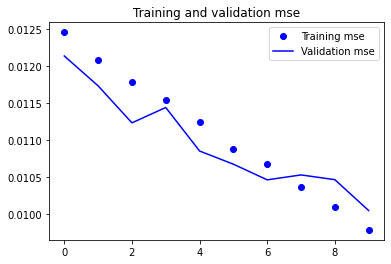

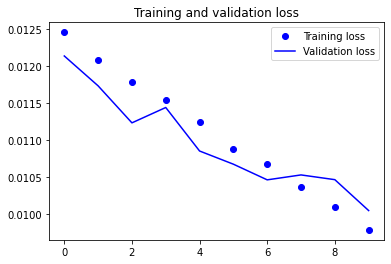

In [41]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(workdir + '//mse_loss_plot.png')
plt.show()

In [42]:
# test validation
predicted_classes = best_model.predict(test_X)

715/715 [==============================] - 28s 37ms/step


In [43]:
predicted_value = predicted_classes

In [44]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_y)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [67]:
c.to_csv(workdir + '/DeepAUCv2_epoch_10_ht_result_new.csv')

In [46]:
c

,Predicted,Test
0,0.776219,0.528562
1,0.935249,0.930958
2,0.890053,0.759249
3,0.941818,0.936510
4,0.882936,0.823453
...,...,...
22873,0.743234,0.975578
22874,0.979556,0.980529
22875,0.899360,0.960501
22876,0.983109,0.970524


In [47]:
predicted_value.shape

(22878, 1)

Text(0, 0.5, 'predicted_AUC_value')

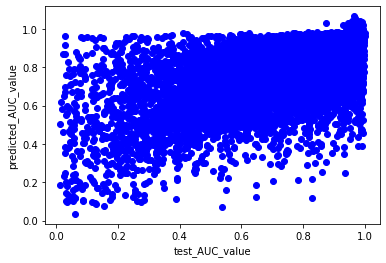

In [48]:
# scatter plot as test validation
plt.scatter(test_y,predicted_value,c='blue')
plt.xlabel('test_AUC_value')
plt.ylabel('predicted_AUC_value')
# plt.savefig(workdir + '/DeepAUCv2_epoch_10_ht_test_scatterplot_new.png')

In [49]:
# calculate RMSE

rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.12679861064567194


In [50]:
mae = (np.abs(b[0]-a[0])).sum()
mae / len(b)

0.07608268393580953

In [51]:
mse

0.016077887661672712

In [52]:
# R-squared value

from sklearn.metrics import r2_score
r2_value = r2_score(b, a) 
print(r2_value)

0.5219426542836239


In [53]:
full_test = pd.read_csv('/data/yingfei/cancer_data/test_data.csv')

In [54]:
full_test = full_test[['ARXSPAN_ID', 'DRUG_NAME']]

In [55]:
eval_data = test_data[['ARXSPAN_ID', 'DRUG_NAME', 'auc']].copy()
eval_data['pred_auc'] = predicted_value
eval_data

,ARXSPAN_ID,DRUG_NAME,auc,pred_auc
0,ACH-000802,JW-7-24-1,0.528562,0.776219
1,ACH-000802,KIN001-260,0.930958,0.935249
2,ACH-000802,NSC-87877,0.759249,0.890053
3,ACH-000802,PLX-4720,0.936510,0.941818
4,ACH-000802,ERK5-IN-1,0.823453,0.882936
...,...,...,...,...
22873,ACH-000438,KIN001-266,0.975578,0.743234
22874,ACH-000438,LUMINESPIB,0.980529,0.979556
22875,ACH-000438,NUTLIN-3A,0.960501,0.899360
22876,ACH-000438,SGC0946,0.970524,0.983109


In [56]:
full_test['comb'] = full_test.ARXSPAN_ID + full_test.DRUG_NAME
eval_data['comb'] = eval_data.ARXSPAN_ID + eval_data.DRUG_NAME
eval_data = pd.merge(full_test, eval_data, on = ['ARXSPAN_ID', 'DRUG_NAME'], how = 'left')

In [57]:
type(full_test.comb[0])

str

In [58]:
eval_data_arr = pd.DataFrame(eval_data.ARXSPAN_ID.unique(), columns = ['ARXSPAN_ID'])
eval_data_arr['true_auc_arr'] = [[] for _ in range(len(eval_data_arr))]
eval_data_arr['pred_auc_arr'] = [[] for _ in range(len(eval_data_arr))]
eval_data_arr

,ARXSPAN_ID,true_auc_arr,pred_auc_arr
0,ACH-000802,[],[]
1,ACH-001496,[],[]
2,ACH-000267,[],[]
3,ACH-000508,[],[]
4,ACH-001106,[],[]
...,...,...,...
64,ACH-000953,[],[]
65,ACH-000561,[],[]
66,ACH-000819,[],[]
67,ACH-000873,[],[]


In [59]:
for i in range(len(eval_data)):
    cl_id = eval_data.loc[i, 'ARXSPAN_ID']
    auc = eval_data.loc[i, 'auc']
    pred_auc =  eval_data.loc[i, 'pred_auc']
    if np.isnan(auc):
        #eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'true_auc_arr'].values[0].append(1)
        #eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'pred_auc_arr'].values[0].append(1)
        continue
    eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'true_auc_arr'].values[0].append(auc)
    eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'pred_auc_arr'].values[0].append(pred_auc)

In [60]:
eval_data_arr

,ARXSPAN_ID,true_auc_arr,pred_auc_arr
0,ACH-000802,"[0.528562, 0.930958, 0.759249, 0.93651, 0.8234...","[0.7762189, 0.93524885, 0.89005286, 0.9418184,..."
1,ACH-001496,"[0.8600040000000001, 0.935607, 0.919367, 0.861...","[0.721455, 0.91140664, 0.85157484, 0.9372215, ..."
2,ACH-000267,"[0.730128, 0.930868, 0.761296, 0.94428, 0.7239...","[0.7628348, 0.9592155, 0.90200263, 0.7027653, ..."
3,ACH-000508,"[0.958722, 0.966097, 0.832343, 0.818851, 0.953...","[0.7669825, 0.91619885, 0.86654806, 0.7948702,..."
4,ACH-001106,"[0.670247, 0.845083, 0.720917, 0.705755, 0.865...","[0.6862056, 0.9008161, 0.8519385, 0.66277045, ..."
...,...,...,...
64,ACH-000953,"[0.771624, 0.902238, 0.788892, 0.987629, 0.977...","[0.7513126, 0.87975883, 0.8032219, 0.7316645, ..."
65,ACH-000561,"[0.806557, 0.92585, 0.747498, 0.974266, 0.7882...","[0.7398468, 0.929042, 0.8975643, 0.9491248, 0...."
66,ACH-000819,"[0.8246040000000001, 0.93947, 0.778985, 0.9747...","[0.7589171, 0.9422953, 0.8850465, 0.945125, 0...."
67,ACH-000873,"[0.6613979999999999, 0.876398, 0.837356, 0.971...","[0.69982064, 0.8735905, 0.80489826, 0.95107853..."


In [61]:
pred_values = eval_data_arr.pred_auc_arr.apply(lambda x: np.array(x)).to_numpy()
true_values = eval_data_arr.true_auc_arr.apply(lambda x: np.array(x)).to_numpy()

In [62]:
### NDCG
from sklearn.metrics import ndcg_score
#ndcg_all = ndcg_score([p for p in pred_values],[t for t in true_values])
#ndcg_10 = ndcg_score([p for p in pred_values],[t for t in true_values], k = 10)
ndcg_all_values = []
ndcg_10_values = []
for i in range(len(pred_values)):
    pred_value = eval_data_arr['pred_auc_arr'].apply(lambda x:list(map(lambda y:1-y, x)))[i]
    true_value = eval_data_arr['true_auc_arr'].apply(lambda x:list(map(lambda y:1-y, x)))[i]
    ndcg_all_values.append(ndcg_score([pred_value],[true_value]))
    ndcg_10_values.append(ndcg_score([pred_value],[true_value], k = 10))
    
ndcg_all = np.mean(ndcg_all_values)
ndcg_10 = np.mean(ndcg_10_values)

print(ndcg_all)
print(ndcg_10)

0.9255710872371127
0.7657867002046594


In [63]:
### Recall
results = []
for top_k in [1, 2, 5, 10]:
    dict_test_cell_line_idx_perf = {}
    for cur_cell_line_idx in range(len(pred_values)):
        # step 1
        # per the ground truth
        gt_aucs = true_values[cur_cell_line_idx]
        # find the top k drugs's idx
        topk_drug_idx_gt = np.argsort(gt_aucs)[:top_k]
        # step 2
        # per the predicted scores
        pred_scores = pred_values[cur_cell_line_idx]
        assert gt_aucs.shape == pred_scores.shape
        # find the top k drugs'idx (note: here its by pred scores)
        topk_drug_idx_pred = np.argsort(pred_scores)[:top_k]
        # step 3
        # recall@k
        cur_recall_at_k = len(
            set(topk_drug_idx_pred).intersection(set(topk_drug_idx_gt))
        ) / len(set(topk_drug_idx_gt))
        dict_test_cell_line_idx_perf[cur_cell_line_idx] = cur_recall_at_k

    avg_recall_at_k = np.mean(list(dict_test_cell_line_idx_perf.values()))
    results.append((f"Recall@{top_k}", round(avg_recall_at_k, 4)))
print(results)

[('Recall@1', 0.3768), ('Recall@2', 0.4058), ('Recall@5', 0.4203), ('Recall@10', 0.4522)]


In [64]:
### AUC
results = []
for top_k in [1, 2, 5, 10]:
    dict_test_cell_line_topk_auc_sum_gt = {}
    dict_test_cell_line_topk_auc_sum_pred = {}
    for cur_cell_line_idx in range(len(pred_values)):
        # step 1
        # per the predicted scores
        pred_scores = pred_values[cur_cell_line_idx]
        # find the top k drugs'idx (note: here its by pred scores)
        topk_drug_idx_pred = np.argsort(pred_scores)[:top_k]
        # step 2
        # per the ground truth
        gt_aucs = true_values[cur_cell_line_idx]
        # find the top k predicted drugs' (per ground truth) aucs
        topk_drug_idx_gt = np.argsort(gt_aucs)[:top_k]
        dict_test_cell_line_topk_auc_sum_gt[cur_cell_line_idx] = np.mean(
            gt_aucs[topk_drug_idx_gt]
        )
        dict_test_cell_line_topk_auc_sum_pred[cur_cell_line_idx] = np.mean(
            gt_aucs[topk_drug_idx_pred]
        )

    avg_auc_topk_gt = np.mean(
        list(dict_test_cell_line_topk_auc_sum_gt.values())
    )
    avg_auc_topk_pred = np.mean(
        list(dict_test_cell_line_topk_auc_sum_pred.values())
    )

    results.append(
        (
            f"Auc@{top_k}",
            f"{round(avg_auc_topk_pred, 4)} (GT: {round(avg_auc_topk_gt, 4)})",
        )
    )

print(results)

[('Auc@1', '0.2468 (GT: 0.1198)'), ('Auc@2', '0.3131 (GT: 0.157)'), ('Auc@5', '0.378 (GT: 0.222)'), ('Auc@10', '0.4392 (GT: 0.2893)')]


In [65]:
from scipy.stats import pearsonr, spearmanr
print(pearsonr(c.Predicted, c.Test)[0], spearmanr(c.Predicted, c.Test)[0])

0.7294949189925679 0.7278606688434116


In [66]:
c

,Predicted,Test
0,0.776219,0.528562
1,0.935249,0.930958
2,0.890053,0.759249
3,0.941818,0.936510
4,0.882936,0.823453
...,...,...
22873,0.743234,0.975578
22874,0.979556,0.980529
22875,0.899360,0.960501
22876,0.983109,0.970524


In [ ]:
[('Auc@1', '0.36090001463890076 (GT: 0.11209999769926071)'), ('Auc@2', '0.40849998593330383 (GT: 0.24279999732971191)'), ('Auc@5', '0.4742000102996826 (GT: 0.3368000090122223)'), ('Auc@10', '0.5327000021934509 (GT: 0.3993000090122223)')]

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')